## Arbitrary value imputation with Scikit-learn ==> SimpleImputer

Scikit-learn provides a class to perform the most common data imputation techniques.

The **SimpleImputer** provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the Scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## In this demo:

We will do **arbitrary value imputation with Scikit-learn** using the Ames House Price Dataset.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of this course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the classes that we need to impute 
# missing data with sklearn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [5]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [6]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [7]:
# Now we impute the missing values with SimpleImputer

# Create an instance of the simple imputer
# indicating that we want to impute with a constant
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

For arbitrary value imputation, we need to set the strategy to 'constant' and indicate the arbitrary value in the fill_value argument. 

In [8]:
# we can look at the "learned" imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [9]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [10]:
# we can transform the array to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


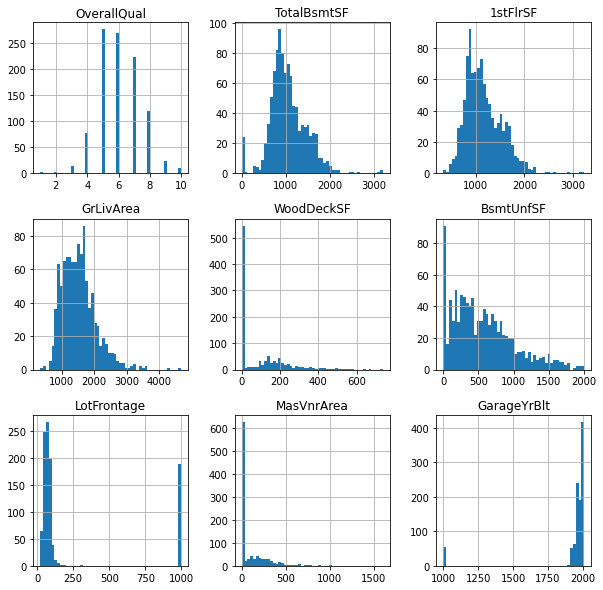

In [11]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

The tall bar at 999 in LotFrontage's histogram appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

**Remember to be cautious with the order in which you pass the column names** as we discussed in the previous notebook.

### SimpleImputer: different procedures on different features


Sometimes, we want to implement different imputation techniques to different features. How can we do this using the SimpleImputer?

We need to use another class called [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [13]:
# let's look at the missing values

X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

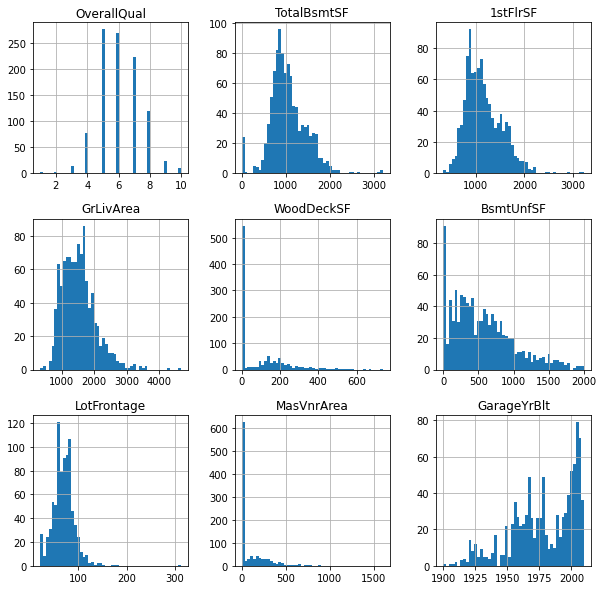

In [14]:
# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute each of LotFrontage, MasVnrArea and GarageYrBlt with different arbitrary values.

In [15]:
# We pass the features and the transformers to
# the column transformer.

# In this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will
# be retained, and the rest dropped.

preprocessor = ColumnTransformer(transformers=[
    
    ('imputer_LotFrontAge', SimpleImputer(
        strategy='constant', fill_value=999), ['LotFrontage']),
    
    ('imputer_MasVnrArea', SimpleImputer(
        strategy='constant', fill_value=-10), ['MasVnrArea']),
    
    ('imputer_GarageYrBlt', SimpleImputer(
        strategy='constant', fill_value=1700), ['GarageYrBlt'])
    
], remainder='drop')

In [16]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('imputer_LotFrontAge',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 SimpleImputer(fill_value=-10,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('imputer_GarageYrBlt',
                                 SimpleImputer(fill_value=1700,
                                               strategy='constant'),
                                 ['GarageYrBlt'])])

In [17]:
# we can explore the transformers like this:

preprocessor.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

In [18]:
# and we can look at the parameters learned like this:

# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].statistics_

array([999.])

In [19]:
# for MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].statistics_

array([-10.])

In [20]:
# for GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].statistics_

array([1700.])

In [21]:
# and now we can impute the data

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

**ANOTHER NOTE OF CAUTION**

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates 3 single column dataframes, one with each of the indicated variables
- The SimpleImputers learn the parameters in their respective sliced dataframes
    - In this case they don't learn anything, because we hard code the arbitrary value
- ColunmnTransformer contatenates back the 3 single column dataframes into the final result, which is a 3 column dataframe

So note that you will not get all the variables from the original X_train, unless you create imputers for all the variables!!

Also, there is a risk of messing up with the order of the features, if we do not use the transformers within a pipeline or we do not keep an eye on the order of the features in the train set, before they were converted to numpy arrays.

In [22]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
            ).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


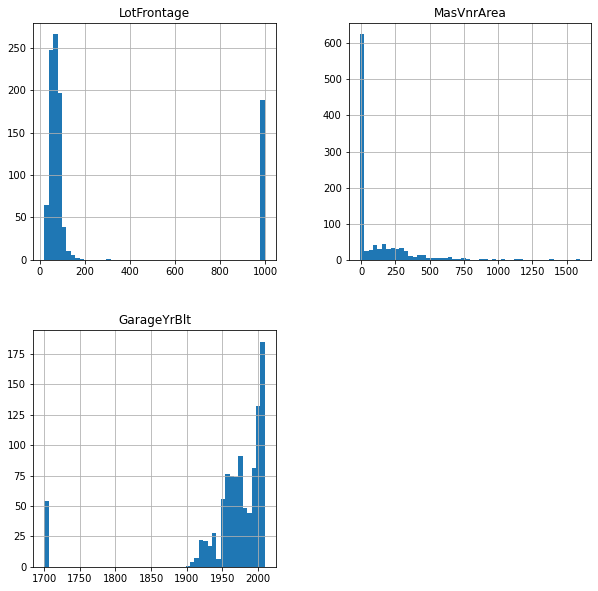

In [23]:
X_train = pd.DataFrame(X_train,
             columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
                      )

X_train.hist(bins=50, figsize=(10,10))

plt.show()

Note the bars corresponding to the arbitrary values at 1700, 999 and -1 for each feature.